<a href="https://colab.research.google.com/github/BlackCurrantDS/ATiML-Project/blob/master/Base_Line_with_imbalance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook establishes a baseline using Bag of words approach on the books .

**Getting data froam the gutenberg**

In [0]:
#Unzip the Overall data
!unzip Gutenberg_English_Fiction_1k.zip -d books_set


In [0]:
#Reading the meta data file
import pandas as pd

data = []

import os
file = os.path.abspath('books_set/Gutenberg_English_Fiction_1k/master996.csv')

with open(file, "rb") as myfile:
    # read the header seperately
    # decode it as 'utf-8', remove any special characters, and split it on the comma (or deliminator)
    header = myfile.readline().decode('utf-8').replace('\r\n', '').split(';')
    # read the rest of the data
    for line in myfile:
        row = line.decode('utf-8', errors='ignore').replace('\r\n', '').split(';')
        data.append(row)

# save the data as a dataframe
meta_data = pd.DataFrame(data=data, columns = header)
meta_data.head(5)

,Book_Name,book_id,guten_genre,Author_Name
0,The Mystery of the Boule Cabinet: A Detective ...,pg10067.epub,Detective and Mystery,Stevenson| Burton Egbert
1,The Pupil,pg1032.epub,Literary,James| Henry
2,At Love's Cost,pg10379.epub,Literary,Garvice| Charles
3,The Heart of the Range,pg10473.epub,Western Stories,White| William Patterson
4,The Worshipper of the Image,pg10812.epub,Literary,Gallienne| Richard Le


In [0]:
#Extracting the bookid into Dataframe column FileNo, book id pg10067- FileNo - 10067

meta_data['FileNo'] = meta_data['book_id'].str.replace(r'\D+', '').astype(int)

#Checkign the values

meta_data.sort_values(by=['FileNo'], inplace=True)
meta_data

,Book_Name,book_id,guten_genre,Author_Name,FileNo
961,Alice's Adventures in Wonderland,pg11CarolAlice.epub,Literary,Carroll| Lewis,11
962,Through the Looking-Glass,pg12CarolGlassLook.epub,Literary,Carroll| Lewis,12
995,A Tale of Two Cities,pg98DickensTaleCities.epub,Literary,Dickens| Charles,98
958,Persuasion,pg105JaneAusPersuatn.epub,Literary,Austen| Jane,105
959,Return of Sherlock Holmes,pg108DoyleReturnSherlk.epub,Detective and Mystery,Connan| Doyle,108
...,...,...,...,...,...
863,Kate Vernon: A Tale. Vol. 2 (of 3),pg53356.epub,Literary,Alexander| Mrs.,53356
864,The Touch of Abner,pg53604.epub,Literary,Cody| H. A.,53604
865,Kate Vernon: A Tale. Vol. 3 (of 3),pg53668.epub,Literary,Alexander| Mrs.,53668
964,Mardi: and A Voyage Thither I,pg13720HermanVoyage1.epub,Sea and Adventure,Melville| Herman,137201


**Getting book content**

In [0]:
import glob

# Getting all files and its names into dict and then converting to dataframe"""

Content = {}

#Its placed in Books folder at local , need to change it later 
%timeit

files = glob.glob("books_set//Gutenberg_English_Fiction_1k//Gutenberg_19th_century_English_Fiction//*.html")
for f in files:
    with open(f,mode ='r', encoding = 'utf8') as myfile:
        Content[f]=myfile.read().replace("<br>", '\n')


In [0]:
#Putting it in dataframe
df = pd.DataFrame.from_dict(Content,orient='index').reset_index()

#Renaming column names
df.columns = ['File_Name', 'Data']
print(df.head(5))
print(df['File_Name'][0])
df['File_Name'] = df['File_Name'].str.replace("books_set//Gutenberg_English_Fiction_1k//Gutenberg_19th_century_English_Fiction/", "l")
print(df['File_Name'][0])
#Adding FilNo column to join
df['FileNo'] = df['File_Name'].str.replace(r'\D+', '').astype(int)
left = df
right = meta_data
result = pd.merge(left, right , how='inner', on=['FileNo', 'FileNo'])

#Checking resulting dataframe
result.info()

#Dropping unnecessery columns

books=result.drop(['File_Name', 'book_id'], axis=1)
books.head(5)

                                           File_Name                                               Data
0  books_set//Gutenberg_English_Fiction_1k//Guten...  <p>This etext was produced by Gardner Buchanan...
1  books_set//Gutenberg_English_Fiction_1k//Guten...  <p>IF it had not been for Bunsey, the novelist...
2  books_set//Gutenberg_English_Fiction_1k//Guten...  <p>This book has its title from that dashing s...
3  books_set//Gutenberg_English_Fiction_1k//Guten...  <p>E-text prepared by Lionel Sear\n<p>Joseph W...
4  books_set//Gutenberg_English_Fiction_1k//Guten...  <p>Edition: 10\n<p>The Prose of Alfred Lichten...
books_set//Gutenberg_English_Fiction_1k//Gutenberg_19th_century_English_Fiction/pg14490-content.html
lpg14490-content.html
<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 0 to 995
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   File_Name    996 non-null    object
 1   Data         996 non-

,Data,FileNo,Book_Name,guten_genre,Author_Name
0,<p>This etext was produced by Gardner Buchanan...,14490,A Daughter of To-Day,Literary,Duncan| Sara Jeannette
1,"<p>IF it had not been for Bunsey, the novelist...",20661,The Romance of an Old Fool,Love and Romance,Field| Roswell Martin
2,<p>This book has its title from that dashing s...,6410,Once Aboard the Lugger-- The History of George...,Humorous and Wit and Satire,Hutchinson| A. S. M.
3,<p>Edition: 10\n<p>The Prose of Alfred Lichten...,5663,The Prose of Alfred Lichtenstein,Literary,Lichtenstein| Alfred
4,<p>Decorative graphic\n<p>This edition first p...,1193,The Coxon Fund,Literary,James| Henry


In [0]:
from collections import Counter
print('Dataset shape %s' % Counter(books['guten_genre']))

Dataset shape Counter({'Literary': 794, 'Detective and Mystery': 111, 'Sea and Adventure': 36, 'Love and Romance': 18, 'Western Stories': 18, 'Humorous and Wit and Satire': 6, 'Ghost and Horror': 6, 'Christmas Stories': 5, 'Allegories': 2})


**Cleaning html tags **

In [0]:
from bs4 import BeautifulSoup
books['Data']= [BeautifulSoup(text).get_text() for text in books['Data'] ]
books.head()

,Data,FileNo,Book_Name,guten_genre,Author_Name
0,This etext was produced by Gardner Buchanan.\n...,14490,A Daughter of To-Day,Literary,Duncan| Sara Jeannette
1,"IF it had not been for Bunsey, the novelist, I...",20661,The Romance of an Old Fool,Love and Romance,Field| Roswell Martin
2,This book has its title from that dashing sent...,6410,Once Aboard the Lugger-- The History of George...,Humorous and Wit and Satire,Hutchinson| A. S. M.
3,Edition: 10\nThe Prose of Alfred Lichtenstein ...,5663,The Prose of Alfred Lichtenstein,Literary,Lichtenstein| Alfred
4,Decorative graphic\nThis edition first publish...,1193,The Coxon Fund,Literary,James| Henry


In [0]:
books.rename(columns = {'Data': 'data', 'guten_genre': 'genre'} , inplace = True)

**Plotting class counts**

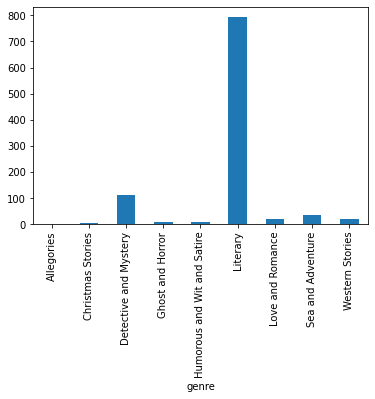

<Figure size 432x288 with 0 Axes>

In [0]:
#Plotting number of authors per gerne
import matplotlib.pyplot as plt
books.groupby('genre')['data'].count().plot(kind = 'bar')
plt.show()
plt.clf()


**cleaning and removing stop words**

In [0]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')
import nltk
nltk.download('averaged_perceptron_tagger')
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
from nltk.corpus import stopwords
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

**Additional stop_words, it has common names, verbs**

In [0]:
stop_words.extend(["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"])


In [0]:
stop_words.extend(["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "a", "aaron", "abbey",
                   "abbie", "abdul", "abe", "across", "abel", "abigail", "about", "above", 
                   "abraham", "abram", "abst", "accordance", "according", "act", "actually", 
                   "ada", "adah", "adalberto", "adaline", "adam", "adan", "added", "among", 
                   "addie", "adela", "adelaida", "adelaide", "adele", "adelia", "adelina", 
                   "adeline", "adell", "adella", "adelle", "adena", "adina", "adj", "adolfo", 
                   "adolph", "adopted", "adria", "adrian", "adriana", "adriane", "adrianna", 
                   "adrien", "adrienne", "after", "afterwards", "afton", "again", "against", 
                   "agatha", "agnes", "agnus", "agueda", "agustina", "ahmad", "ahmed", "ai",
                   "aida", "besides", "aide", "aiko", "aileen", "ailene", "aimee", "aja", "akilah", "al", "alaina", "alaine", "alan", "alana", "alane", "alanna", "alayna", "alba", "albert", "alberta", "albertha", "albertina", "albertine", "alberto", "albina", "alda", "alden", "aldo", "alease", "alec", "alecia", "e", "aleen", "aleisha", "eg", "alejandra", "alejandrina", "alejandro", "alena", "elsewhere", "alene", "alesha", "aleshia", "alesia", "alessandra", "aleta", "aletha", "everywhere", "alethea", "alethia", "alex", "alexander", "alexandria", "alexia", "alexis", "alfonso", "alfonzo", "alfred", "alfreda", "alfredia", "alfredo", "ali", "alia", "alica", "alice", "alicia", "alida", "alina", "alisa", "alise", "had", "alisha", "alishia", "alisia", "alison", "alissa", "alita", "alix", "aliza", "all", "alla", "allan", "alleen", "allegra", "allen", "allena", "allene", "allie", "alline", "allison", "allyn", "allyson", "alma", "hop", "almeda", "almeta", "almost", "alona", "alone", "along", "alonso", "alonzo", "alpha", "alphonse", "alphonso", "already", "also", "alta", "altagracia", "altha", "althea", "although", "alton", "alva", "alvaro", "alvera", "alverta", "alvin", "alvina", "always", "alyce", "alycia", "alysa", "alyse", "alysha", "alysia", "alyson", "alyssa", "am", "amado", "amal", "amalia", "amanda", "amber", "amberly", "ambrose", "amee", "amelia", "long", "america", "m", "ami", "amie", "amiee", "amina", "may", "amira", "ammie", "amongst", "amos", "might", "amparo", "amy", "an", "ana", "anabel", "anamaria", "anastacia", "anastasia", "and", "andera", "anderson", "andra", "andre", "na", "andrea", "andreas", "andres", "andrew", "andria", "andy", "anette", "angel", "angela", "angele", "angelena", "angeles", "angelia", "angelic", "angelica", "angelina", "angeline", "angelique", "angelita", "angella", "angelo", "angelyn", "angie", "angila", "angla", "angle", "anglea", "anh", "anibal", "anika", "anisha", "anissa", "anita", "anitra", "anjanette", "anjelica", "ann", "anna", "annabel", "annabell", "annabelle", "overall", "annalee", "annalisa", "annamae", "annamaria", "annamarie", "anne", "anneliese", "annelle", "annemarie", "put", "annetta", "annice", "annie", "rather", "annika", "annis", "annmarie", "announce", "another", "answered", "anthony", "antione", "antionette", "antoine", "anton", "antone", "antonetta", "antonette", "antonia", "antonietta", "antonina", "antonio", "antony", "antwan", "any", "anya", "anyhow", "anyone", "anything", "anywhere", "apolonia", "april", "apryl", "ara", "should", "araceli", "aracelis", "aracely", "arcelia", "archie", "ardath", "ardelia", "ardell", "ardella", "ardelle", "arden", "ardis", "ardith", "are", "aren", "arent", "aretha", "argelia", "argentina", "ariana", "arianna", "arianne", "arica", "arie", "ariel", "arielle", "arla", "arlean", "arleen", "arlen", "there", "arlena", "arlene", "arletha", "arletta", "arlette", "arlie", "arlinda", "arline", "arlyne", "armand", "armanda", "they", "armandina", "armando", "armida", "arminda", "arnetta", "arnette", "arnita", "arnold", "arnoldo", "arnulfo", "around", "arron", "three", "art", "arthur", "artie", "arturo", "arvilla", "as", "asa", "asha", "ashanti", "ashely", "ashlea", "toward", "ashlee", "ashleigh", "ashley", "ashli", "ashlie", "ashly", "ashlyn", "asia", "ask", "unlikely", "asked", "asley", "assunta", "astrid", "ups", "at", "athena", "aubrey", "audie", "audra", "audrea", "audrey", "audria", "audrie", "audry", "august", "augusta", "augustina", "augustine", "augustus", "aundrea", "aura", "aurea", "aurelia", "aurelio", "aurora", "aurore", "austin", "auth", "autumn", "ava", "available", "avelina", "avery", "avis", "avril", "awilda", "ayako", "ayana", "ayanna", "ayesha", "azalee", "azucena", "azzie", "b", "babara", "babette", "back", "bailey", "bambi", "bao", "barabara", "barb", "barbara", "barbera", "barbie", "barbra", "bari", "barney", "barrett", "barrie", "bart", "basil", "would", "basilia", "be", "bea", "beata", "beatrice", "beatris", "beatriz", "beau", "beaulah", "bebe", "became", "because", "becki", "becky", "become", "becomes", "becoming", "bee", "abby", "been", "before", "beforehand", "begin", "beginning", "behind", "being", "belen", "belia", "belinda", "belkis", "bell", "bella", "belle", "below", "ben", "benedict", "benita", "benito", "benjamin", "bennett", "benny", "benton", "berenice", "berna", "bernadette", "bernadine", "bernard", "bernarda", "bernardina", "bernardine", "bernardo", "adrianne", "berneice", "adriene", "bernice", "bernie", "berniece", "bernita", "bert", "agripina", "berta", "agustin", "bertha", "bertie", "bertram", "beryl", "beside", "bess", "bessie", "best", "beth", "bethanie", "aisha", "bethann", "akiko", "bethany", "bethel", "betsey", "bette", "better", "bettie", "bettina", "betty", "bettyann", "bettye", "between", "beula", "beulah", "bev", "beverlee", "beverley", "beverly", "beyond", "bianca", "bibi", "bill", "billie", "billy", "billye", "aleida", "birdie", "birgit", "blaine", "blair", "blake", "blanca", "blanch", "blanche", "blondell", "blossom", "blythe", "bo", "bobbi", "bobbie", "bobbye", "alexa", "bok", "alexandra", "bong", "bonita", "bonnie", "bonny", "booker", "boris", "both", "boyce", "boyd", "brad", "bradford", "bradley", "bradly", "brady", "brain", "branda", "aline", "brande", "brandee", "branden", "brandi", "brandon", "brandy", "brant", "breana", "breann", "breanna", "breanne", "bree", "brenda", "brendan", "brendon", "brenna", "brent", "brenton", "bret", "brett", "brian", "briana", "brianne", "brice", "bridget", "bridgett", "bridgette", "brigette", "brigid", "brigida", "brigitte", "brinda", "britany", "britney", "britni", "britt", "britta", "brittaney", "brittani", "brittanie", "britteny", "brittni", "brittny", "brock", "broderick", "bronwyn", "brook", "brooke", "brooks", "bruce", "amada", "bruna", "brunilda", "bruno", "bryan", "bryanna", "bryant", "bryce", "brynn", "bryon", "bud", "buddy", "buena", "buffy", "buford", "bula", "bunny", "burl", "burma", "burt", "burton", "buster", "but", "analisa", "by", "byron", "c", "ca", "caitlin", "caitlyn", "calandra", "caleb", "calista", "andree", "callie", "calvin", "camelia", "camellia", "cameron", "camie", "camila", "camilla", "camille", "cammy", "can", "candace", "candance", "angelika", "candelaria", "candi", "candice", "candida", "candis", "candy", "candyce", "cannot", "cant", "caprice", "caption", "cara", "caren", "carey", "cari", "anisa", "caridad", "carie", "carina", "carisa", "anja", "carissa", "carita", "carl", "carla", "carlee", "carleen", "carlena", "carlene", "carletta", "carley", "carli", "carline", "carlita", "carlo", "carlos", "carlota", "annett", "carlotta", "annette", "carlton", "carly", "carlyn", "carma", "annita", "carman", "carmel", "carmela", "carmelia", "carmelina", "antoinette", "carmelita", "carmella", "carmelo", "carmen", "carmina", "carmine", "carmon", "carol", "carola", "carolann", "carole", "carolee", "carolin", "caroline", "caroll", "carolyn", "carolyne", "carolynn", "caron", "caroyln", "carri", "carrie", "carrol", "carry", "carson", "cary", "caryl", "carylon", "caryn", "casandra", "casey", "casie", "ariane", "casimira", "cassandra", "cassaundra", "cassey", "cassidy", "cassie", "cassondra", "cassy", "catalina", "catarina", "caterina", "catharine", "catherin", "catherina", "catherine", "cathern", "catheryn", "cathey", "cathi", "cathie", "cathleen", "cathrine", "cathryn", "cathy", "catina", "catrice", "catrina", "cayla", "cecil", "cecila", "cecile", "aron", "cecilia", "cecille", "cecily", "cedric", "cedrick", "celena", "celesta", "celeste", "celestina", "celestine", "celia", "celina", "celinda", "celine", "celsa", "ceola", "cesar", "chad", "ashton", "chadwick", "chae", "chan", "chana", "asuncion", "chance", "chanda", "chandra", "chanel", "chanell", "chanelle", "chang", "chantal", "chantay", "chante", "chantel", "chantell", "chantelle", "chapter", "chara", "charis", "charise", "charissa", "charisse", "charita", "charity", "charla", "charlena", "charlene", "charles", "charlesetta", "charlette", "charley", "charlie", "charline", "charlott", "charlotte", "charlsie", "charlyn", "charmaine", "charolette", "chase", "chasidy", "chasity", "chastity", "chau", "chauncey", "chaya", "barbar", "chelsea", "chelsey", "chelsie", "cher", "chere", "cheree", "cherelle", "cheri", "barry", "cherie", "barton", "cherilyn", "cherish", "cherlyn", "cherri", "cherrie", "cherry", "cherryl", "chery", "cheryl", "cheryle", "cheryll", "beckie", "chester", "chet", "cheyenne", "chi", "chia", "chieko", "chin", "china", "ching", "belva", "chiquita", "chloe", "chong", "chris", "chrissy", "christa", "bennie", "christal", "christeen", "christel", "christen", "christene", "christi", "christia", "christian", "christiana", "christiane", "christie", "christin", "bernetta", "christina", "christine", "christinia", "christoper", "berry", "christopher", "christy", "chrystal", "chu", "chuck", "chun", "chung", "cicely", "ciera", "cierra", "cinda", "cinderella", "cindi", "cindy", "betsy", "cinthia", "cira", "clair", "clara", "clare", "clarence", "claretha", "claretta", "claribel", "clarice", "clarine", "claris", "clarisa", "clarissa", "clarita", "billi", "clark", "classie", "claud", "claude", "claudette", "claudia", "claudie", "claudine", "claudio", "clay", "clayton", "clemencia", "clement", "clemente", "clementina", "bob", "clementine", "clemmie", "bobby", "cleo", "bobette", "cleopatra", "cleora", "cleotilde", "cleta", "cletus", "cleveland", "cliff", "clifford", "clifton", "clint", "clinton", "clora", "clorinda", "clotilde", "clyde", "co", "codi", "cody", "colby", "coleen", "brandie", "coleman", "colene", "coletta", "colette", "colin", "colleen", "collen", "collene", "collette", "collin", "columbus", "come", "concepcion", "conception", "concetta", "concha", "conchita", "connie", "brianna", "conrad", "constance", "consuela", "consuelo", "contessa", "cora", "coral", "coralee", "coralie", "corazon", "cordelia", "cordell", "cordia", "cordie", "coreen", "corene", "coretta", "corey", "brittany",
                   "corie", "brittney", "corina", "corine", "corinna", "corinne", "corliss", "cornelia", "cornelius", "cornell", "corrie", "corrin", "corrina", "corrine", "corrinne", "cortez", "cortney", "could", "couldnt", "courtney", "buck", "coy", "craig", "creola", "cried", "cris", "criselda", "bulah", "crissy", "crista", "cristal", "cristen", "cristi", "cristie", "cristin", "cristina", "cristine", "cristobal", "cristopher", "cristy", "cruz", "crysta", "crystal", "crystle", "cuc", "cami", "curt", "curtis", "cyndi", "cyndy", "cammie", "cynthia", "cyril", "cyrstal", "cyrus", "cythia", "d", "dacia", "candie", "dagmar", "candra", "dagny", "dahlia", "daina", "daine", "daisey", "daisy", "dakota", "dale", "dalene", "carin", "dalia", "dalila", "dallas", "dalton", "damaris", "damian", "damien", "damion", "damon", "dan", "dana", "danae", "dane", "carlie", "danelle", "danette", "dani", "danial", "danica", "daniel", "daniela", "daniele", "daniell", "daniella", "danielle", "danika", "danille", "danilo", "danita", "dann", "danna", "dannette", "dannie", "dannielle", "danny", "danuta", "danyel", "danyell", "danyelle", "daphine", "dara", "darby", "carolina", "darcel", "darcey", "darci", "darcie", "darcy", "darell", "daren", "daria", "darin", "dario", "carroll", "darius", "darla", "carter", "darleen", "darlena", "darlene", "darline", "darnell", "daron", "darrel", "darrell", "darren", "darrick", "darrin", "cassi", "darron", "darryl", "darwin", "daryl", "date", "dave", "david", "davida", "davina", "davis", "dawn", "dawna", "dawne", "dayle", "dayna", "daysi", "deadra", "dean", "deana", "deandra", "deandre", "deandrea", "deane", "deangelo", "cecelia", "deann", "deanna", "deanne", "deb", "debbi", "debbie", "debbra", "debby", "debera", "debi", "debora", "deborah", "debra", "debrah", "debroah", "dede", "dedra", "dee", "deeann", "deeanna", "deedee", "deena", "deetta", "deidra", "deidre", "deirdre", "deja", "del", "delana", "delbert", "delcie", "delena", "delfina", "delia", "delicia", "delila", "delilah", "delinda", "delisa", "dell", "della", "delma", "delmar", "delmer", "delmy", "delois", "charleen", "deloise", "delora", "deloras", "delores", "deloris", "delorse", "delpha", "delphia", "delphine", "delsie", "delta", "demarcus", "charmain", "demetra", "demetria", "chas", "demetrice", "demetrius", "dena", "chassidy", "denae", "deneen", "denese", "denice", "denis", "denise", "denisha", "denita", "denna", "dennis", "dennise", "denny", "denver", "denyse", "cherise", "deon", "cherly", "deonna", "derek", "derick", "derrick", "deshawn", "desirae", "desire", "desiree", "despina", "dessie", "destiny", "detra", "devin", "devon", "devona", "devora", "devorah", "dewayne", "dewey", "dewitt", "dexter", "dia", "diamond", "dian", "diana", "diane", "diann", "dianna", "christena", "dianne", "dick", "did", "didnt", "diedra", "diedre", "diego", "dierdre", "digna", "dillon", "dimple", "dina", "dinah", "dino", "dinorah", "dion", "dione", "dionna", "dionne", "ciara", "dirk", "divina", "dixie", "do", "dodie", "does", "cindie", "doesnt", "dollie", "dolly", "dolores", "claire", "doloris", "domenic", "domenica", "dominga", "domingo", "dominic", "dominica", "clarinda", "dominick", "dominique", "dominque", "domitila", "domonique", "don", "dona", "donald", "donella", "donetta", "donette", "dong", "donita", "donn", "donna", "donnell", "clelia", "donnetta", "donnette", "donnie", "donny", "donovan", "dont", "donte", "donya", "dora", "dorathy", "dorcas", "doreatha", "doreen", "dorene", "doretha", "dorethea", "doretta", "dori", "doria", "dorian", "dorie", "dorinda", "dorine", "doris", "dorla", "cole", "dorotha", "dorothea", "dorothy", "dorris", "dorsey", "dortha", "dorthea", "dorthey", "dorthy", "dot", "dotty", "colton", "doug", "douglas", "douglass", "dovie", "down", "doyle", "dreama", "drew", "drucilla", "duane", "dudley", "dulcie", "dung", "during", "dusti", "dustin", "dusty", "dwana", "dwayne", "dwight", "dylan", "each", "earl", "earle", "earlean", "cori", "earleen", "earlene", "earlie", "earline", "earnest", "earnestine", "eartha", "easter", "eboni", "ebonie", "ebony", "echo", "ed", "edda", "eddie", "cory", "eddy", "edelmira", "eden", "edgardo", "edie", "edith", "edmond", "edmund", "edmundo", "edna", "edra", "edris", "eduardo", "edward", "edwardo", "edwin", "edyth", "edythe", "effie", "efrain", "efren", "ehtel", "eight", "eighty", "eilene", "either", "ela", "eladia", "elaina", "elaine", "elana", "elane", "elanor", "elayne", "elba", "elda", "elden", "eldon", "eldora", "eldridge", "eleanor", "eleanora", "eleanore", "elease", "elena", "elene", "eleni", "elenor", "elenora", "eleonor", "eleonora", "eleonore", "elfreda", "elfrieda", "elfriede", "eli", "elia", "eliana", "elias", "dania", "elicia", "elida", "elidia", "elijah", "elina", "elinor", "elinore", "elisa", "elisabeth", "elise", "eliseo", "elisha", "elissa", "eliz", "eliza", "elizabeth", "elizbeth", "elizebeth", "dante", "elke", "ella", "ellamae", "ellan", "ellen", "daphne", "ellena", "elli", "ellie", "elliot", "elliott", "ellis", "ellsworth", "elly", "ellyn", "elma", "elmer", "elmira", "elmo", "elna", "elnora", "elodia", "elois", "eloisa", "eloise", "elouise", "eloy", "elroy", "elsa", "else", "elsie", "elsy", "elton", "elva", "elvera", "elvia", "elvie", "elvina", "elvira", "elvis", "elwanda", "elwood", "elyse", "elza", "ema", "emanuel", "emelda", "emelia", "emelina", "emeline", "emely", "emerald", "emerita", "emerson", "emery", "emiko", "emil", "emile", "emilee", "emilia", "emilie", "emilio", "emily", "emma", "emmaline", "emmanuel", "emmie", "emmitt", "emmy", "emogene", "emory", "ena", "enda", "enedina", "deedra", "enid", "enoch", "enola", "enough", "enrique", "enriqueta", "epifania", "delaine", "era", "erasmo", "eric", "erica", "erich", "erick", "ericka", "erik", "erika", "erin", "erinn", "erlene", "erlinda", "erline", "erma", "ermelinda", "erminia", "erna", "ernest", "ernestina", "ernestine", "ernesto", "ernie", "errol", "ervin", "erwin", "eryn", "esmeralda", "esperanza", "essie", "esteban", "estefana", "estela", "estell", "estella", "estelle", "ester", "esther", "estrella", "etc", "etha", "ethan", "denisse", "ethel", "ethelene", "ethelyn", "ethyl", "etsuko", "etta", "ettie", "eufemia", "eugena", "eugene", "eugenia", "eugenie", "eugenio", "eula", "eulah", "eulalia", "desmond", "eun", "euna", "eunice", "eura", "eusebia", "eusebio", "eustolia", "evalyn", "evan", "evangelina", "evangeline", "eve", "evelia", "evelin", "evelina", "eveline", "evelyn", "evelyne", "evelynn", "even", "ever", "everett", "everette", "every", "everyone", "everything", "evette", "evia", "evie", "evita", "evon", "evonne", "ewa", "except", "exie", "ezekiel", "ezequiel", "ezra", "f", "fabian", "fabiola", "fae", "fairy", "faith", "fallon", "fannie", "fanny", "far", "farah", "farrah", "fatima", "fatimah", "faustina", "faustino", "fausto", "fawn", "fay", "faye", "fe", "felecia", "felica", "felice", "felicia", "felicidad", "felicita", "felicitas", "felipa", "felipe", "felisa", "felisha", "felix", "felton", "ferdinand", "fermin", "fermina", "fern", "fernanda", "fernande", "fernando", "ferne", "few", "fidel", "fidela", "fidelia", "fifty", "filiberto", "filomena", "fiona", "first", "five", "flavia", "fleta", "fletcher", "flo", "flor", "flora", "florance", "florence", "florencia", "florencio", "florene", "dottie", "florentina", "florentino", "floretta", "floria", "florida", "florinda", "florine", "drema", "florrie", "flossie", "drusilla", "floy", "floyd", "dulce", "fonda", "duncan", "for", "forest", "former", "formerly", "dwain", "forrest", "forty", "foster", "dyan", "found", "four", "fran", "france", "francene", "frances", "francesca", "francesco", "franchesca", "francie", "francina", "francine", "francis", "francisca", "francisco", "francoise", "frank", "eda", "frankie", "franklyn", "fransisca", "fred", "freda", "edgar", "fredda", "freddie", "edison", "freddy", "frederic", "frederica", "frederick", "fredericka", "fredia", "fredric", "fredrick", "fredricka", "freeda", "freeman", "edwina", "freida", "frida", "frieda", "fritz", "from", "fumiko", "eileen", "further", "g", "gabriel", "gabriela", "gabriele", "gabriella", "gabrielle", "gail", "gala", "gale", "elbert", "galen", "galina", "garfield", "garland", "garnet", "garnett", "garret", "garrett", "garry", "gary", "gaston", "gavin", "gay", "gaye", "elenore", "gayla", "gayle", "gaylene", "gaylord", "gaynell", "gearldine", "gema", "gemma", "gena", "gene", "genesis", "geneva", "genevie", "genevieve", "elin", "genevive", "genia", "genie", "genna", "gennie", "genny", "genoveva", "geoffrey", "georgann", "george", "georgeann", "elizabet", "georgeanna", "georgene", "georgetta", "georgette", "georgia", "georgiana", "georgiann", "georgianne", "georgina", "georgine", "gerald", "geraldine", "geraldo", "geralyn", "gerard", "gerardo", "gerda", "geri", "german", "gerri", "gerry", "gertie", "gertrude", "gertrudis", "get", "ghislaine", "gia", "gianna", "gidget", "gigi", "gilbert", "gilberte", "gilberto", "gilda", "gillian", "gilma", "gina", "ginette", "ginger", "elvin", "ginny", "gino", "giovanna", "giovanni", "gisela", "gisele", "giselle", "gita", "giuseppe", "giuseppina", "gladis", "glady", "gladys", "glayds", "glen", "glenda", "glendora", "glenn", "glenna", "glennie", "glennis", "glinda", "gloria", "glory", "glynda", "glynis", "go", "golda", "golden", "emmett", "goldie", "gonzalo", "good", "gordon", "got", "grace", "gracia", "gracie", "eneida", "graciela", "grady", "graham", "grant", "granville", "grayce", "grazyna", "great", "gregg", "gregoria", "gregorio", "gregory", "greta", "gretchen", "gretta", "gricelda", "grisel", "griselda", "guadalupe", "gudrun", "guillermina", "guillermo", "gus", "gussie", "gustavo", "guy", "gwen", "gwenda", "gwendolyn", "gwenn", "gwyn", "gwyneth", "h", "ha", "hae", "hai", "esta", "hailey", "hal", "haley", "halina", "halley", "hallie", "han", "hang", "hanh", "hank", "hanna", "hannah", "hannelore", "hans", "harlan", "harland", "harley", "harmony", "harold", "harriet", "harriett",
                   "harriette", "harris", "harrison", "harry", "harvey", "has", "hasnt", "hassan", "hassie", "hattie", "have", "havent", "haydee", "eva", "hayden", "hayley", "haywood", "hazel", "he", "heath", "heather", "hector", "hed", "hedwig", "hedy", "heide", "heidi", "heidy", "heike", "helaine", "helen", "helena", "helene", "helga", "hellen", "hence", "henrietta", "henriette", "henry", "her", "herb", "herbert", "here", "hereafter", "hereby", "herein", "heres", "hereupon", "herlinda", "herma", "herman", "hermelinda", "hermina", "hermine", "faviola", "herminia", "hers", "herschel", "herself", "federico", "hershel", "hertha", "hes", "hester", "hettie", "hid", "hien", "hilaria", "hilario", "hilary", "hilda", "hildegard", "hildred", "hillary", "hilma", "hilton", "him", "himself", "hipolito", "hiroko", "his", "hoa", "hobert", "holley", "holli", "hollie", "holly", "home", "homer", "honey", "hong", "hope", "horace", "horacio", "hortencia", "hortense", "hortensia", "hosea", "houston", "how", "howard", "however", "hoyt", "hubert", "huey", "hugh", "hui", "hulda", "humberto", "hundred", "hung", "hunter", "huong", "hwa", "hye", "hyman", "hyo", "hyon", "i", "ian", "id", "ida", "idalia", "idell", "idella", "ie", "iesha", "if", "ignacio", "franklin", "ike", "ilana", "ileana", "ileen", "ilene", "iliana", "ill", "illa", "ilona", "ilse", "iluminada", "im", "ima", "imelda", "imogene", "in", "inc", "include", "includes", "indeed", "index", "india", "indira", "inell", "ines", "inez", "information", "inga", "inge", "ingeborg", "inger", "ingrid", "inocencia", "instead", "internet", "into", "iola", "iona", "garth", "ione", "iraida", "irena", "irene", "iris", "irish", "irma", "irmgard", "irvin", "irving", "gaynelle", "is", "isa", "isaac", "isabel", "genaro", "isabell", "isabella", "isadora", "isaiah", "isaias", "isaura", "isela", "isiah", "isidra", "isidro", "isis", "ismael", "isnt", "isobel", "israel", "isreal", "issac", "it", "its", "itself", "ivan", "ivana", "ive", "georgianna", "ivelisse", "georgie", "ivey", "ivonne", "ivory", "ivy", "izetta", "izola", "j", "ja", "jacalyn", "jacelyn", "germaine", "jacinda", "jacinta", "jacinto", "gertha", "jackeline", "gertrud", "jackelyn", "jacki", "gertude", "jackie", "jacklyn", "jackqueline", "jackson", "jaclyn", "gil", "jacob", "jacqualine", "jacque", "jacquelin", "jacqueline", "jacquelyne", "jacquelynn", "jacques", "jacquetta", "jacqui", "jacquie", "jacquiline", "jacquline", "jacqulyn", "jada", "jadwiga", "jae", "jaime", "jaimee", "jaimie", "jake", "jaleesa", "jalisa", "jama", "jamaal", "jamal", "jamar", "jame", "jamee", "jamel", "james", "jamey", "jami", "jamie", "jamika", "jamila", "jamison", "jammie", "jan", "jana", "janae", "janay", "jane", "janean", "janee", "janeen", "graig", "janel", "janell", "janella", "janelle", "greg", "janene", "janessa", "janet", "janeth", "janett", "janetta", "janette", "janey", "jani", "janice", "grover", "janie", "janina", "janine", "janis", "janise", "janita", "jann", "janna", "jannet", "jannette", "jannie", "january", "janyce", "jaqueline", "jaquelyn", "jared", "jarod", "jarred", "jarrett", "jarrod", "jarvis", "jasmin", "jason", "jasper", "hana", "jaunita", "javier", "jay", "jaye", "jayme", "jaymie", "jayna", "jayne", "jayson", "jazmin", "jazmine", "jc", "jean", "jeana", "jeane", "jeanelle", "jeanene", "jeanett", "jeanetta", "jeanette", "jeanice", "jeanie", "jeanine", "jeanmarie", "jeanna", "jeanne", "jeannetta", "jeannette", "jeannie", "jeannine", "jed", "jeff", "hee", "jefferey", "jefferson", "jeffery", "jeffie", "jeffrey", "jeffry", "jen", "jena", "jenae", "jene", "jenee", "jenell", "jenelle", "jenette", "jeneva", "heriberto", "jeni", "jenice", "jenifer", "jeniffer", "hermila", "jenine", "jenise", "jenna", "jennefer", "jennell", "herta", "jennette", "jenni", "jennie", "hiedi", "jennifer", "jenniffer", "jennine", "jerald", "jeraldine", "hilde", "jeramy", "hildegarde", "jere", "jeremiah", "jeri", "jerica", "jerilyn", "hiram", "jermaine", "hisako", "jerold", "jerome", "jeromy", "jerrell", "jerri", "hollis", "jerrica", "jerrie", "jerrod", "jerrold", "jerry", "jesica", "jess", "jesse", "jessenia", "jessi", "jessia", "jessica", "jessika", "jestine", "hsiu", "jesus", "hue", "jesusa", "jesusita", "hugo", "jetta", "jettie", "jewel", "jewell", "ji", "jill", "jillian", "hyacinth", "jim", "jimmie", "jin", "jina", "hyun", "jinny", "jo", "joan", "joana", "joane", "joann", "ignacia", "joanna", "joanne", "ila", "joannie", "ilda", "joaquin", "joaquina", "jocelyn", "jodee", "jodi", "jodie", "jody", "joeann", "joel", "joella", "joelle", "joellen", "ina", "joesph", "joetta", "joette", "joey", "johana", "johanna", "johanne", "john", "johna", "johnathan", "johnathon", "johnetta", "johnie", "johnna", "ira", "johnnie", "johnny", "johnsie", "irina", "johnson", "joi", "joie", "jolanda", "joleen", "jolene", "irwin", "jolie", "joline", "jolyn", "jolynn", "jon", "isabelle", "jona", "jonah", "jonas", "jonathon", "jone", "jonell", "jonelle", "jong", "joni", "jonie", "jonna", "jonnie", "jordan", "jordon", "iva", "jorge", "jose", "josef", "ivette", "josefa", "josefina", "josefine", "joselyn", "joseph", "josephina", "josephine", "josette", "josh", "joshua", "josiah", "josie", "jack", "joslyn", "jospeh", "josphine", "josue", "jovan", "joy", "joya", "joyce", "joycelyn", "joye", "juan", "juana", "juanita", "jacquelyn", "jude", "judi", "judie", "judith", "judson", "judy", "julee", "julene", "jules", "juli", "jade", "julia", "julian", "juliana", "juliane", "juliann", "julianna", "julianne", "julie", "julieann", "julienne", "juliet", "julieta", "julietta", "juliette", "julio", "julissa", "julius", "june", "jung", "junie", "junior", "junita", "junko", "just", "justa", "justina", "justine", "jutta", "k", "ka", "kacey", "kaci", "kacie", "kacy", "kai", "kaila", "kaitlin", "kaitlyn", "kala", "kaleigh", "kaley", "kali", "kallie", "kalyn", "kam", "kamala", "janiece", "kami", "kamilah", "kandace", "kandice", "kandis", "kandra", "kandy", "kanesha", "kanisha", "kara", "karan", "kareem", "kareen", "karen", "karena", "karey", "kari", "karie", "karima", "karin", "karina", "jasmine", "karine", "karisa", "karissa", "karl", "karla", "karleen", "karlene", "karly", "karlyn", "karma", "karmen", "karol", "karole", "karoline", "karolyn", "karon", "karren", "karri", "karrie", "karry", "kary", "karyl", "karyn", "kasandra", "kasha", "kasi", "kassandra", "kassie", "kate", "katelin", "katelyn", "katelynn", "katerine", "kathaleen", "katharina", "katharine", "katharyn", "kathe", "katheleen", "katherin", "katherine", "kathern", "kathey", "kathi", "kathie", "kathleen", "kathlene", "kathline", "kathlyn", "kathrin", "kathrine", "kathryn", "kathryne", "kathy", "kathyrn", "kati", "katia", "katie", "katlyn", "katrice", "katrina", "kattie", "katy", "kay", "jenny", "kayce", "kaycee", "kaye", "kayla", "kaylee", "jeremy", "kayleen", "kayleigh", "kaylene", "jerlene", "kazuko", "kecia", "keeley", "keely", "keena", "keesha", "keiko", "keila", "keira", "keisha", "keith", "jesenia", "keitha", "keli", "kelle", "kelley", "kelli", "kellie", "kelly", "jessie", "kellye", "kelsey", "kelsi", "kelsie", "kelvin", "kemberly", "ken", "kena", "kenda", "kendal", "kendall", "kendra", "kendrick", "keneth", "jimmy", "kenia", "kenisha", "kenna", "kenneth", "kenny", "kent", "kenton", "joanie", "kenyatta", "kenyetta", "kera", "keren", "keri", "kermit", "kerri", "kerrie", "kerry", "kerstin", "kesha", "joe", "keshia", "keturah", "keva", "keven", "kevin", "khadijah", "khalilah", "kia", "kiana", "kiara", "kiera", "kiersten", "kiesha", "kieth", "kim", "kimber", "kimberlee", "johnette", "kimberley", "kimberlie", "kimberly", "kimbery", "kimbra", "kimi", "kimiko", "kina", "kindra", "king", "kira", "kirby", "kirk", "kirsten", "kirstie", "kirstin", "kisha", "kit", "kittie", "jonathan", "kitty", "kiyoko", "kizzie", "kizzy", "klara", "know", "korey", "kori", "kortney", "kory", "kourtney", "kraig", "kris", "krishna", "krissy", "krista", "kristal", "kristan", "kristeen", "kristel", "kristen", "kristi", "kristian", "kristie", "kristin", "kristina", "kristine", "kristofer", "kristy", "kristyn", "krysta", "jovita", "krystal", "krysten", "krystin", "krystina", "krystle", "krystyna", "kum", "kurt", "kurtis", "kyla", "kyle", "kylee", "kylie", "kym", "jule", "kymberly", "kyoko", "kyong", "kyra", "kyung", "l", "lacey", "lachelle", "laci", "lacie", "lacresha", "lacy", "ladawn", "ladonna", "lady", "lael", "lahoma", "lai", "laine", "lajuana", "lakeesha", "lakeisha", "lakendra", "lakenya", "lakesha", "lakeshia", "lakia", "lakiesha", "justin", "lakisha", "lakita", "lala", "lamonica", "lamont", "lan", "lana", "lance", "landon", "lane", "lanell", "lanelle", "lanette", "lani", "lanie", "lanita", "lannie", "lanny", "lanora", "laquanda", "laquita", "lara", "larae", "kandi", "laraine", "laree", "larhonda", "larisa", "larissa", "larita", "laronda", "larraine", "larry", "larue", "lasandra", "lashanda", "lashandra", "lashaun", "lashaunda", "lashawn", "lashawna", "lashay", "lashell", "lashon", "lashonda", "lashunda", "last", "latanya", "latasha", "latashia", "later", "latesha", "latia", "laticia", "latina", "latisha", "latonia", "latonya", "latoria", "latosha", "latoya", "latoyia", "latrice", "latricia", "latrina", "latrisha", "kasey", "latter", "latterly", "kasie", "launa", "laura", "lauralee", "lauran", "laure", "laureen", "laurel", "lauren", "laurena", "laurence", "laurene", "lauretta", "laurette", "lauri", "katherina", "laurice", "laurie", "katheryn", "laurinda", "laurine", "lauryn", "lavada", "lavelle", "lavenia", "lavera", "lavern", "laverna", "laverne", "laveta", "lavette", "lavinia", "lavon", "lavona", "lavonda", "katina", "lavone", "lavonia", "lavonna", "lawana", "lawanda", "lawanna", "lawerence", "lawrence", "layla", "layne", "lazaro", "le", "lea", "leah", "lean", "leana", "leandra", "leandro", "leann", "keenan", "leanna", "leanne", "leanora", "least", "leatha", "leatrice", "lecia", "leda", "leeann", "kellee", "leeanna", "leeanne", "leena", "leesa", "left", "leia", "leida", 
                   "leif", "leigh", "leigha", "leighann", "leila", "leilani", "leisa", "leisha", "lekisha", "lela", "lelah", "leland", "lelia", "lemuel", "len", "kennith", "lena", "lenard", "lenita", "kenya", "lenna", "lennie", "lenny", "lenora", "lenore", "leo", "leola", "leoma", "leon", "leona", "leonard", "leonarda", "leonardo", "leone", "leonel", "leonia", "leonida", "leonie", "leonila", "leonor", "leonora", "leonore", "leontine", "leopoldo", "leora", "kiley", "leota", "lera", "kimberely", "leroy", "les", "kimberli", "lesa", "lesha", "lesia", "leslee", "lesley", "lesli", "leslie", "less", "lessie", "kip", "lester", "let", "leta", "letha", "leticia", "letisha", "letitia", "lets", "lettie", "letty", "levi", "lewis", "lezlie", "li", "lia", "liana", "liane", "lianne", "libbie", "libby", "liberty", "librada", "lida", "lidia", "lien", "lieselotte", "ligia", "like", "likely", "lila", "lili", "lilia", "lilian", "liliana", "lilla", "kristle", "lilli", "kristopher", "lillia", "lilliam", "lillian", "lilliana", "lillie", "lilly", "lily", "lin", "lina", "lincoln", "linda", "lindsay", "lindsey", "lindsy", "lindy", "line", "linette", "ling", "linh", "links", "linn", "linnea", "linnie", "lino", "linsey", "linwood", "lionel", "lisa", "lisabeth", "lisandra", "lisbeth", "lise", "lisette", "lisha", "laila", "lissa", "lissette", "lita", "livia", "liz", "liza", "lizabeth", "lizbeth", "lizeth", "lizette", "lizzette", "lizzie", "ll", "lamar", "lloyd", "loan", "logan", "loida", "lois", "lola", "lolita", "loma", "lon", "lona", "lang", "londa", "loni", "lonna", "lonnie", "lonny", "lora", "loraine", "loralee", "lore", "lorean", "loree", "loreen", "lorelei", "loren", "lorena", "lorene", "lorenza", "lorenzo", "loreta", "loretta", "lorette", "lori", "loria", "loriann", "lorie", "lorilee", "lashawnda", "lorinda", "loris", "lorita", "lorna", "lorraine", "lasonya", "lorretta", "latarsha", "lorri", "lorriane", "lorrie", "lorrine", "lory", "lottie", "lou", "louanne", "louella", "louetta", "louie", "louis", "louisa", "louise", "loura", "lourdes", "lourie", "love", "lovella", "lovetta", "lovie", "lowell", "loyce", "loyd", "ltd", "lu", "luana", "luann", "luanna", "luanne", "luba", "lucas", "luci", "lucia", "luciano", "lucie", "lucien", "lucienne", "lucila", "lucilla", "lucille", "lucina", "lucio", "lucius", "lucrecia", "lavina", "lucretia", "lucy", "ludie", "ludivina", "luella", "luetta", "luigi", "lavonne", "luis", "luisa", "luise", "luke", "lula", "lulu", "luna", "lupe", "lupita", "lura", "lurlene", "lurline", "luther", "luvenia", "luz", "lyda", "lydia", "lyla", "lyle", "lyman", "lyn", "lynda", "lyndia", "lee", "lyndon", "lyndsay", "lyndsey", "lynell", "lynelle", "lynette", "lynn", "lynna", "lynne", "lynnette", "lynsey", "lynwood", "mabel", "mabelle", "mable", "mac", "machelle", "macie", "mack", "mackenzie", "macy", "madalene", "madaline", "madalyn", "maddie", "made", "madelaine", "madeleine", "madelene", "madeline", "madelyn", "madge", "madie", "madison", "madlyn", "madonna", "mae", "maegan", "mafalda", "magali", "magaly", "magan", "magaret", "magda", "magdalen", "magdalena", "magdalene", "magen", "maggie", "magnolia", "mahalia", "mai", "maia", "maida", "maile", "maira", "maire", "maisha", "maisie", "major", "majorie", "make", "makeda", "makes", "malcolm", "malcom", "malena", "malia", "malik", "malika", "malinda", "malisa", "lexie", "malissa", "malka", "mallie", "mallory", "malorie", "mamie", "mammie", "man", "mana", "manda", "mandi", "mandie", "mandy", "manie", "manual", "manuel", "manuela", "many", "maple", "mara", "maragaret", "maragret", "maranda", "marc", "marcel", "marcela", "marcelina", "marceline", "marcelino", "marcell", "marcella", "marcelle", "marcellus", "marcelo", "marcene", "marchelle", "marcia", "marcie", "marcos", "marcus", "marcy", "maren", "marg", "margareta", "margarett", "margaretta", "margarette", "margarita", "margarite", "margarito", "margart", "margene", "margeret", "margert", "margery", "marget", "margherita", "margie", "margit", "margo", "margorie", "margret", "margrett", "marguerita", "marguerite", "margurite", "margy", "marhta", "mari", "maria", "loise", "mariah", "mariam", "marian", "mariana", "marianela", "mariann", "marianna", "marianne", "mariano", "maribel", "maribeth", "marica", "maricela", "maricruz", "marie", "mariel", "mariela", "mariella", "marietta", "mariette", "mariko", "marilee", "marilou", "marilu", "marilyn", "marilynn", "marin", "marina", "marinda", "marine", "mario", "marion", "lorina", "maris", "lorine", "marisa", "marisela", "marisha", "marisol", "marissa", "marita", "maritza", "marivel", "marjory", "mark", "marketta", "markita", "louann", "markus", "marla", "marlana", "marleen", "marlen", "marlena", "marlene", "marlin", "marline", "marlo", "louvenia", "marlon", "marlyn", "marlys", "marna", "marni", "marnie", "marquerite", "marquetta", "marquis", "marquita", "marquitta", "marry", "marsha", "marshall", "marth", "martha", "luciana", "marti", "martin", "martina", "martine", "marty", "lucile", "marva", "marvel", "marvella", "lucinda", "marvin", "marvis", "marx", "mary", "marya", "maryalice", "maryam", "lue", "maryann", "maryanna", "maryanne", "marybelle", "marybeth", "maryellen", "maryetta", "maryjane", "maryjo", "maryland", "marylee", "marylin", "maryln", "marylou", "marylouise", "marylyn", "marylynn", "maryrose", "masako", "mason", "matha", "mathew", "mathilda", "mathilde", "matilda", "matilde", "matt", "matthew", "mattie", "maud", "maude", "lynetta", "maudie", "maura", "maureen", "maurice", "mauricio", "maurine", "maurita", "ma", "mauro", "mavis", "max", "maxie", "maxima", "maximina", "maximo", "maxine", "maxwell", "maya", "maybe", "maybell", "maybelle", "maye", "mayme", "maynard", "mayola", "mayra", "mazie", "mckenzie", "mckinley", "me", "meagan", "meaghan", "meantime", "meanwhile", "mechelle", "meda", "mee", "meg", "megan", "meggan", "meghan", "meghann", "mei", "mel", "melaine", "melani", "melania", "melanie", "melany", "melba", "melda", "melia", "melida", "melina", "melinda", "melisa", "melissa", "melissia", "melita", "mellie", "mellisa", "mellissa", "melodee", "melodi", "melodie", "melody", "melonie", "melony", "melva", "malvina", "melvin", "melvina", "mendy", "mercedes", "mercedez", "mercy", "meredith", "meri", "merideth", "meridith", "merilyn", "merissa", "merle", "mao", "merlene", "merlin", "merlyn", "merna", "merri", "merrie", "merrilee", "merrill", "marcelene", "merry", "mertie", "mervin", "meryl", "meta", "mi", "mia", "mica", "micaela", "micah", "marci", "michael", "michaela", "marco", "michaele", "michal", "michale", "mardell", "micheal", "michel", "margaret", "michele", "margarete", "michelina", "micheline", "michell", "michelle", "michiko", "mickey", "micki", "marge", "mickie", "miesha", "migdalia", "mignon", "miguelina", "mika", "mikaela", "mike", "mikel", "miki", "margot", "mikki", "milagro", "milagros", "milan", "milda", "mildred", "miles", "milford", "milissa", "millard", "millie", "million", "milly", "milo", "milton", "mimi", "min", "mina", "minda", "mindi", "mindy", "minerva", "ming", "minh", "minna", "minnie", "minta", "marielle", "miquel", "mira", "miranda", "mireille", "mireya", "miriam", "mirian", "mirna", "mirta", "mirtha", "misha", "miss", "missy", "misti", "mistie", "misty", "mitch", "mitchel", "mitchell", "mitsue", "mitsuko", "mittie", "marjorie", "mitzi", "mitzie", "miyoko", "modesto", "mohamed", "mohammad", "mohammed", "moira", "mollie", "molly", "moment", "mona", "monet", "monica", "monika", "monique", "monnie", "monroe", "monserrate", "monte", "monty", "moon", "mora", "more", "moreover", "morgan", "moriah", "morris", "marta", "morton", "mose", "moses", "moshe", "most", "mostly", "mozell", "mozella", "mozelle", "mr", "mrs", "much", "mui", "muoi", "murray", "must", "my", "myesha", "myles", "myong", "myra", "myrl", "myrle", "myrna", "myron", "myrta", "myrtie", "myrtle", "myself", "myung", "n", "nada", "nadene", "nadia", "naida", "nakesha", "nakia", "nakisha", "nakita", "nam", "namely", "nan", "nana", "nancee", "nancey", "nanci", "nancie", "nancy", "nanette", "nannette", "nannie", "naoma", "naomi", "napoleon", "narcisa", "natacha", "natalia", "natalie", "natalya", "natasha", "natashia", "nathalie", "nathanael", "nathanial", "natisha", "natividad", "natosha", "neal", "near", "necole", "ned", "neda", "nedra", "neely", "neida", "neil", "neither", "nelda", "nelia", "nelida", "nell", "nella", "nelle", "nellie", "nelly", "nelson", "nena", "nenita", "neoma", "neomi", "nereida", "nerissa", "nery", "nestor", "neta", "nettie", "neva", "nevada", "never", "nevertheless", "neville", "new", "newton", "next", "nga", "ngan", "ngoc", "nguyet", "nia", "nichelle", "nichol", "nicholas", "nichole", "melynda", "nicholle", "nick", "nicki", "nickie", "nickole", "nicky", "nicol", "nicola", "nicolas", "nicolasa", "nicole", "nicolette", "nicolle", "nida", "nidia", "niesha", "nieves", "nigel", "niki", "nikia", "nikita", "nikki", "nikole", "nila", "nilda", "nilsa", "nina", "nine", "ninety", "micha", "ninfa", "nisha", "nita", "no", "noah", "noble", "nobody", "nobuko", "noe", "noel", "noelia", "noella", "noelle", "noemi", "nola", "nolan", "noma", "nona", "none", "miguel", "nonetheless", "noone", "nor", "nora", "norah", "norbert", "norberto", "mila", "noreen", "noriko", "norine", "norma", "norman", "normand", "not", "nothing", "nova", "millicent", "novella", "now", "nowhere", "nu", "nubia", "numbers", "nydia", "nyla", "o", "obdulia", "ocie", "octavia", "octavio", "oda", "odelia", "odell", "odessa", "odette", "odilia", "odis", "mirella", "of", "ofelia", "off", "often", "oh", "ola", "olen", "olene", "oleta", "olevia", "olga", "olimpia", "olin", "olinda", "oliva", "olive", "oliver", "olivia", "ollie", "olympia", "oma", "modesta", "omar", "omega", "omer", "omitted", "on", "moises", "ona", "once", "one", "oneida", "ones", "onie", "onita", "only", "onto", "opal", "ophelia", "or", "oralee", "oralia", "ord", "oren", "oretha", "orlando", "orpha", "orval", "orville", "oscar", "ossie", "osvaldo", "oswaldo", 
                   "otelia", "muriel", "otha", "other", "others", "otherwise", "otilia", "otis", "myriam", "otto", "ouida", "our", "ours", "ourselves", "myrtice", "out", "myrtis", "over", "owen", "own", "ozell", "ozella", "ozie", "nadine", "p", "pa", "pablo", "page", "pages", "paige", "palma", "palmer", "palmira", "pamala", "pamela", "pamelia", "pamella", "pamila", "pamula", "pansy", "paola", "paris", "parker", "part", "parthenia", "particia", "pasquale", "pasty", "pat", "patience", "nathan", "patria", "patrica", "nathaniel", "patrice", "patricia", "patrina", "patsy", "patti", "pattie", "patty", "paula", "paulene", "paulette", "pauline", "paulita", "paz", "pearl", "pearle", "pearlene", "pearlie", "pearline", "pearly", "pedro", "peg", "peggie", "peggy", "pei", "penelope", "penney", "penni", "pennie", "penny", "per", "percy", "perhaps", "perla", "perry", "pete", "peter", "petra", "petrina", "petronila", "phebe", "phil", "philip", "phillip", "phillis", "philomena", "phung", "phuong", "nickolas", "phylicia", "phylis", "phyliss", "pia", "piedad", "pierre", "ping", "pinkie", "piper", "pok", "polly", "porfirio", "porsche", "porsha", "porter", "portia", "pp", "precious", "preston", "pricilla", "prince", "princess", "priscila", "priscilla", "proud", "providencia", "prudence", "q", "qiana", "queen", "queenie", "quentin", "quiana", "quincy", "quinn", "nohemi", "quintin", "quinton", "quyen", "r", "rachael", "rachal", "racheal", "rachel", "rachele", "norene", "rachell", "rachelle", "racquel", "rae", "raeann", "norris", "raelene", "rafael", "rafaela", "raguel", "raina", "raisa", "raleigh", "ralph", "ramiro", "ramon", "ramona", "ramonita", "ran", "rana", "ranae", "randa", "randal", "randall", "randee", "ok", "randi", "randolph", "ranee", "raphael", "raquel", "rashad", "rasheeda", "rashida", "raul", "raven", "ray", "raye", "rayford", "raymon", "raymond", "raymonde", "raymundo", "rayna", "re", "rea", "reagan", "reatha", "reba", "rebbeca", "rebbecca", "ora", "rebeca", "rebecca", "rebecka", "rebekah", "recent", "recently", "reed", "reena", "ref", "refs", "refugia", "refugio", "regan", "regena", "regenia", "reggie", "regina", "reginald", "regine", "reginia", "reid", "reiko", "reina", "reinaldo", "reita", "related", "rema", "remedios", "remona", "pam", "rena", "renaldo", "renata", "renate", "renato", "renay", "pandora", "renda", "renea", "renetta", "renita", "replied", "research", "ressie", "reta", "retha", "retta", "reuben", "reva", "rex", "reyes", "patrick", "reyna", "reynaldo", "rhea", "rheba", "rhett", "paul", "rhiannon", "rhoda", "pauletta", "rhona", "paulina", "rhonda", "ria", "ricardo", "rich", "richard", "richelle", "richie", "rick", "rickey", "ricki", "rickie", "ricky", "rico", "rigoberto", "rikki", "riley", "rima", "rina", "risa", "rita", "rivka", "robbi", "robbie", "robby", "robbyn", "robena", "robert", "roberta", "roberto", "robin", "robt", "robyn", "rocco", "phoebe", "rochel", "rochell", "rochelle", "rocio", "rocky", "phyllis", "rod", "roderick", "rodger", "pilar", "rodney", "rodolfo", "rodrick", "rodrigo", "rogelio", "roger", "roland", "rolanda", "rolande", "rolando", "rolf", "rolland", "roma", "romaine", "roman", "romana", "romelia", "romeo", "romona", "pura", "ron", "rona", "ronald", "roni", "ronna", "ronni", "ronnie", "ronny", "roosevelt", "rory", "rosa", "rosalba", "rosalee", "rosalia", "rosalie", "rosalind", "rosalinda", "rosaline", "rosalva", "rosalyn", "rosamaria", "rosamond", "rosana", "rosann", "rosanna", "rosanne", "rosaria", "rosario", "rosaura", "roscoe", "rose", "roseann", "roseanna", "roseanne", "roselee", "roselia", "roseline", "rosella", "randell", "roselle", "roselyn", "randy", "rosemarie", "rosemary", "rosena", "rosenda", "rosendo", "rosetta", "rosette", "rosia", "rosie", "rosina", "rosio", "raylene", "roslyn", "ross", "rossana", "rossie", "rosy", "rowena", "roxana", "reanna", "roxane", "roxann", "roxanna", "roxanne", "roxie", "roy", "royal", "royce", "reda", "rozanne", "rozella", "ruben", "rubi", "rubie", "rubin", "rubye", "rudolf", "rudolph", "rudy", "rueben", "rufina", "rufus", "run", "rupert", "russel", "russell", "rusty", "ruth", "rutha", "ruthann", "renae", "ruthanne", "ruthe", "ruthie", "ryan", "ryann", "s", "rene", "sabina", "renee", "sabine", "sabra", "renna", "sabrina", "sacha", "sachiko", "sade", "sadie", "sadye", "sage", "rey", "said", "sal", "reynalda", "salena", "salina", "salley", "sallie", "sally", "salome", "salvador", "salvatore", "sam", "ricarda", "samantha", "samara", "samatha", "same", "samella", "samira", "sammie", "sammy", "samual", "samuel", "sana", "sanda", "sandee", "sandi", "sandie", "sandra", "sandy", "sanford", "riva", "sang", "rob", "sanjuana", "sanjuanita", "robbin", "sanora", "santa", "santana", "santiago", "santo", "santos", "sara", "sarah", "sarai", "saran", "sari", "sarina", "sarita", "sasha", "saturnina", "sau", "saul", "saundra", "savanna", "say", "scarlet", "scarlett", "scot", "scott", "scottie", "scotty", "sean", "search", "season", "sebastian", "sebrina", "sec", "section", "see", "seem", "seema", "seemed", "seeming", "seems", "ronda", "selena", "selene", "selina", "selma", "sena", "senaida", "september", "serafina", "serena", "sergio", "serina", "serita", "rosalina", "server", "seth", "seven", "seventy", "several", "seymour", "sha", "shad", "shae", "shaina", "shakia", "shakita", "shala", "shalanda", "shall", "shalon", "shalonda", "shameka", "shamika", "shan", "shana", "shanae", "shanda", "shandi", "shandra", "shane", "shaneka", "shanel", "shanell", "shanelle", "shanice", "shanika", "shaniqua", "shanita", "shannan", "shannon", "rosita", "shanon", "shanta", "shantae", "shantay", "shante", "shantel", "shantell", "shantelle", "shanti", "shaquana", "shaquita", "shara", "roxy", "sharan", "sharda", "sharee", "sharell", "sharen", "shari", "sharice", "sharie", "sharika", "ruby", "sharilyn", "sharla", "sharleen", "sharlene", "sharmaine", "sharolyn", "sharon", "sharri", "russ", "sharyl", "sharyn", "shasta", "shaun", "shauna", "shaunda", "shaunna", "shaunta", "shaunte", "shavon", "shavonda", "shavonne", "shawana", "shawanda", "shawanna", "shawn", "shawnda", "shawnee", "shawnna", "shawnta", "shay", "shayla", "shayna", "shayne", "she", "shea", "sheba", "shed", "sheena", "sheila", "sheilah", "shela", "shelba", "shelby", "sheldon", "shelia", "shell", "shella", "shelley", "shelli", "shellie", "shelly", "shemeka", "shemika", "shena", "shenika", "shenita", "shenna", "shera", "sheree", "sherell", "sheri", "sherice", "sheridan", "sherie", "santina", "sherika", "sherill", "sherilyn", "sherise", "sherita", "sherlene", "sherley", "sherly", "sherlyn", "sherman", "sheron", "sherrell", "sherri", "sherrie", "sherril", "savannah", "sherrill", "sherron", "sherry", "sherryl", "sherwood", "shery", "sheryl", "sheryll", "shes", "shiela", "shila", "shiloh", "shin", "shira", "shirely", "shirl", "shirlee", "shirleen", "shirlene", "shirley", "shirly", "shizue", "shizuko", "shon", "shona", "setsuko", "shonda", "shondra", "shonna", "shonta", "shoshana", "shu", "shakira", "shyla", "sibyl", "sid", "sidney", "sierra", "signe", "sigrid", "silas", "silva", "silvana", "silvia", "sima", "simon", "simona", "simone", "simonne", "sina", "since", "shani", "sindy", "siobhan", "sirena", "siu", "shanna", "six", "sixty", "skye", "slyvia", "so", "socorro", "sofia", "soila", "sol", "solange", "soledad", "solomon", "some", "somehow", "someone", "somer", "something", "sometime", "sometimes", "somewhere", "sommer", "son", "sona", "sharita", "sondra", "song", "sonia", "sonja", "sonny", "sonya", "sharonda", "soo", "sharron", "sook", "soon", "sophia", "sophie", "soraya", "sparkle", "spencer", "spring", "stacee", "stacey", "staci", "stacia", "stacie", "stacy", "stanford", "shawna", "stanley", "stanton", "star", "starla", "starr", "stefan", "stefani", "stefania", "stefanie", "stefany", "steffanie", "stella", "stepanie", "stephan", "stephane", "stephani", "stephania", "stephanie", "stephen", "stephenie", "stephine", "stephnie", "sterling", "shelton", "steve", "steven", "stevie", "stewart", "still", "stop", "stormy", "stuart", "suanne", "such", "sudie", "sue", "sueann", "suellen", "suk", "sulema", "sumiko", "summer", "sun", "sunday", "sung", "sunni", "sunny", "sunshine", "susan", "susana", "susann", "susanna", "susannah", "susanne", "susie", "susy", "suzan", "suzann", "suzanna", "suzanne", "suzette", "suzi", "suzy", "svetlana", "sybil", "syble", "sydney", "sylvester", "sylvia", "sylvie", "synthia", "syreeta", "t", "ta", "tabetha", "tabitha", "tad", "tai", "taina", "taisha", "tajuana", "takako", "taking", "takisha", "talia", "talisha", "talitha", "tama", "tamar", "tamara", "tamatha", "tambra", "tameika", "tameka", "tamekia", "tamela", "tamera", "tamesha", "tami", "tamica", "tamie", "tamiko", "tamisha", "sixta", "tammara", "tammera", "tammi", "tammie", "tammy", "tana", "tandra", "tandy", "taneka", "tanesha", "tangela", "tania", "tanika", "tanja", "tanna", "tanner", "tara", "tarah", "taren", "tarra", "tarsha", "taryn", "tasha", "tashia", "tashina", "tasia", "tatiana", "tatum", "tatyana", "taunya", "tawana", "tawanda", "tawanna", "tawna", "tawnya", "stan", "taylor", "tayna", "ted", "teddy", "tegan", "tell", "stasia", "telma", "temeka", "temika", "tempie", "temple", "ten", "tena", "tenesha", "stephaine", "tenisha", "tennie", "tennille", "teodora", "teodoro", "stephany", "teofila", "tequila", "tera", "tereasa", "terence", "teresa", "teresia", "teresita", "teressa", "teri", "terica", "su", "terina", "terisa", "terra", "terrance", "terrell", "terrence", "terresa", "terri", "terrie", "terrilyn", "terry", "tesha", "tessa", "tessie", "thad", "thaddeus", "thalia", "than", "thanh", "thao", "that", "thatll", "thats", "thatve", "the", "theda", "their", "thelma", "them", "suzie", "themselves", "then", "thence", "theo", "theodora", "theodore", "theola", "thereafter", "thereby", "thered", "therefore", "tabatha", "therein", "therell", "therere", "theres", "theresa", "therese", "theressa", "thereupon", "thereve", "theron", "thersa", "these",
                   "tam", "theyd", "tamala", "theyll", "theyre", "theyve", "thi", "thing", "think", "thirty", "this", "thomas", "thomasena", "thomasina", "thomasine", "thora", "tamika", "those", "though", "thought", "thousand", "thresa", "through", "throughout", "tamra", "thru", "thu", "thurman", "thus", "thuy", "tia", "tiana", "tianna", "tanisha", "tiara", "tien", "tiera", "tanya", "tierra", "tiesha", "tifany", "tari", "tiffaney", "tiffani", "tiffanie", "tiffany", "tiffiny", "tijuana", "til", "tilda", "till", "tillie", "tim", "timika", "timmy", "timothy", "tina", "tawny", "tinisha", "tiny", "tip", "tisa", "tish", "teena", "tisha", "teisha", "titus", "to", "tobi", "tobias", "tobie", "toby", "toccara", "tod", "together", "toi", "told", "tom", "tomas", "tomasa", "tomeka", "tomi", "tomika", "tomiko", "terese", "tommie", "tommy", "tommye", "tomoko", "tona", "tonda", "tonette", "toney", "tonia", "tonie", "tonisha", "tonita", "tonja", "tony", "tonya", "too", "tora", "tess", "tori", "torie", "torri", "torrie", "tory", "tosha", "toshia", "thea", "toshiko", "tova", "towanda", "towards", "toya", "tracee", "traci", "tracie", "theresia", "tracy", "tran", "trang", "travis", "treasa", "treena", "trena", "trent", "trenton", "tresa", "tressa", "tressie", "treva", "trevor", "trey", "tricia", "trillion", "trina", "trinh", "trinidad", "trinity", "trisha", "trista", "tristan", "troy", "trudi", "trudie", "trudy", "trula", "truman", "try", "tu", "tuan", "tula", "tuyet", "twana", "twanda", "twanna", "twenty", "twila", "two", "twyla", "ty", "tyesha", "tyisha", "tyler", "tynisha", "todd", "tyra", "tyree", "tyron", "tyrone", "tyson", "u", "ulrike", "ulysses", "un", "una", "under", "unless", "unlike", "until", "unto", "up", "toni", "upon", "ursula", "us", "used", "usha", "using", "ute", "v", "vada", "val", "valarie", "valda", "valencia", "valene", "valentin", "valentina", "valentine", "valeri", "valeria", "valerie", "tracey", "valery", "valorie", "valrie", "van", "vanda", "vanesa", "vanessa", "vanetta", "vania", "vanita", "vanna", "vannesa", "vannessa", "vashti", "vasiliki", "vaughn", "ve", "veda", "velda", "velia", "vella", "velma", "trish", "velva", "velvet", "vena", "venessa", "venetta", "venice", "venita", "vennie", "venus", "veola", "vera", "verda", "verdell", "verdie", "verena", "vergie", "verla", "verlene", "verlie", "verline", "vern", "verna", "vernell", "vernetta", "vernia", "tyrell", "vernice", "vernie", "vernita", "ula", "vernon", "verona", "veronica", "veronika", "veronique", "versie", "vertie", "very", "vesta", "veta", "vi", "via", "vicenta", "vicente", "vickey", "vickie", "vicky", "victor", "victoria", "vida", "vallie", "viki", "vikki", "vilma", "vance", "vina", "vince", "vincent", "vincenza", "vincenzo", "vinita", "vinnie", "viola", "violet", "violeta", "violette", "virgen", "virgie", "virgil", "virgilio", "virgina", "virginia", "vita", "vito", "viva", "vivan", "vivian", "viviana", "vivien", "vivienne", "vol", "vols", "von", "voncile", "vonda", "vonnie", "vs", "w", "wade", "wai", "waldo", "walker", "wallace", "wally", "walter", "walton", "waltraud", "wan", "wanda", "waneta", "wanetta", "wanita", "ward", "warner", "warren", "was", "wasnt", "wava", "way", "waylon", "wayne", "we", "wed", "vicki", "wei", "weldon", "well", "wen", "victorina", "wendell", "wendi", "wendie", "wendolyn", "wendy", "wenona", "went", "were", "werent", "werner", "wes", "wesley", "weston", "weve", "what", "whatever", "whatll", "whats", "whatve", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "whitley", "whitney", "who", "whod", "whoever", "whole", "wholl", "whom", "whomever", "whos", "whose", "why", "wilber", "wilbert", "wilbur", "wilburn", "wilda", "wiley", "wilford", "wilfred", "wilfredo", "wilhelmina", "wilhemina", "will", "willa", "willard", "willena", "willene", "willetta", "willette", "willia", "william", "williams", "willian", "willie", "williemae", "willis", "willodean", "willow", "willy", "wilma", "wilmer", "wilson", "wilton", "windy", "winford", "winfred", "winifred", "winnie", "winnifred", "winona", "winston", "winter", "with", "within", "without", "wm", "wonda", "wont", "woodrow", "words", "wouldnt", "wyatt", "wynell", "wynona", "x", "xavier", "xenia", "xiao", "xiomara", "xochitl", "xuan", "y", "yadira", "yaeko", "yael", "yahaira", "yajaira", "yan", "yang", "yanira", "yasmin", "yasmine", "yasuko", "yee", "yelena", "yen", "yer", "yes", "yesenia", "yessenia", "yet", "yetta", "yevette", "yi", "ying", "yoko", "yolanda", "yolande", "yolando", "yolonda", "yon", "yong", "yoshie", "yoshiko", "you", "youd", "youlanda", "youll", "young", "your", "youre", "yours", "yourself", "yourselves", "youve", "yu", "yuette", "yuk", "yuki", "yukiko", "yuko", "yulanda", "yun", "yung", "yuonne", "yuri", "yuriko", "yvette", "yvone", "yvonne", "z", "zachariah", "zachary", "zachery", "zack", "zackary", "zada", "zaida", "zana", "zandra", "zane", "zelda", "zella", "zelma", "zena", "zenaida", "zenia", "zenobia", "zetta", "zina", "zita", "zoe", "zofia", "zoila", "zola", "zona", "zonia", "zora", "zoraida", "zula", "zulema", "zulma"])

In [0]:
import re
def take_me_to_cleaners(x):
    x = re.sub('[^a-z\s]', '', x.lower())                  # get rid of noise
    x = [w for w in x.split() if w not in stop_words] # remove stopwords
    return ' '.join(x) 

books['SData'] = books['data'].apply(take_me_to_cleaners)


In [0]:
books['SData'] = books['SData'].str.replace('\d+', '') #remove numeric

In [0]:
books['SData'] = books['SData'].str.replace(r'\b\w\b','').str.replace(r'\s+', ' ') #removing single words

Geeting only verbs and nouns

In [0]:
from nltk import word_tokenize, pos_tag, ne_chunk

import spacy

nlp = spacy.load('en' ,disable=['parser', 'ner'])
nlp.max_length = 1500000
def lemmatization(texts, allowed_postags=['ADJ', 'VERB', 'ADV']):
   
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return (texts_out)

In [0]:
books['SNData'] = lemmatization(books['SData'].apply(word_tokenize).tolist(), allowed_postags=['VERB', 'NOUN'])
#books['SNData'] = lemmatization(books['SData'], allowed_postags=['VERB', 'NOUN']) #change allowed_tag for other tags to be included
books['SNData'] = books['SNData'].str.join(' ')

In [0]:
new_books = books[['FileNo','data', 'genre', 'Author_Name', 'Book_Name']]
new_books.to_csv("books_base_line.csv")

In [100]:
new_books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 0 to 995
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FileNo       996 non-null    int64 
 1   data         996 non-null    object
 2   genre        996 non-null    object
 3   Author_Name  996 non-null    object
 4   Book_Name    996 non-null    object
dtypes: int64(1), object(4)
memory usage: 46.7+ KB


In [0]:
X , y = books['SNData'], books['genre']

In [102]:
len(books['SNData'][0])

115558

In [103]:
len(books['SData'][0])

200802

**Create pipleline**

In [0]:
""" calling base line and balanced accuracy compariosn by making it in impbalance for better comparision"""

""" Making classification using pipline with only bag of words to check the under sampling effect"""

""" This fucntion basically cna be called from any pipline with hold out method, hence callling this for various sampling techniques"""

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
import time
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.metrics import balanced_accuracy_score
from collections import Counter

def eve_clf(classifier, X, y , df_scores, clf_name=None):
    start = time.time()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11, stratify =y, shuffle = True)

    classifier.fit(X_train, y_train)
    end = time.time()
    acc =classifier.score(X_test, y_test)

    print("Accuracy: " + str(classifier.score(X_test, y_test)) + ", Time duration: " + str(end - start))
    print('Changed dataset shape y_train %s' % Counter(y_train))
    print('Changed dataset shape y_test %s' % Counter(y_test))
    y_pred = classifier.predict(X_test)
    conf_mat = confusion_matrix(y_test, y_pred)
    #balanced accuracy
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    clf_score = pd.DataFrame(
        {clf_name: [acc, bal_acc]},
        index=['Accuracy', 'Balanced accuracy']
    )
    
    # Plot confusion_matrix
    fig, ax = plt.subplots(figsize=(15, 10))
    sns.heatmap(conf_mat, annot=True, cmap = "Set3", fmt ="d",
    xticklabels=books.genre.unique(), yticklabels=books.genre.unique())
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    print(classification_report(y_test, y_pred))
    df_scores = pd.concat([df_scores, clf_score], axis=1).round(decimals=3)
    return df_scores

df_scores = pd.DataFrame()



Accuracy: 0.7959866220735786, Time duration: 7.8889992237091064
Changed dataset shape y_train Counter({'Literary': 556, 'Detective and Mystery': 78, 'Sea and Adventure': 25, 'Love and Romance': 13, 'Western Stories': 13, 'Ghost and Horror': 4, 'Humorous and Wit and Satire': 4, 'Christmas Stories': 3, 'Allegories': 1})
Changed dataset shape y_test Counter({'Literary': 238, 'Detective and Mystery': 33, 'Sea and Adventure': 11, 'Love and Romance': 5, 'Western Stories': 5, 'Christmas Stories': 2, 'Humorous and Wit and Satire': 2, 'Ghost and Horror': 2, 'Allegories': 1})


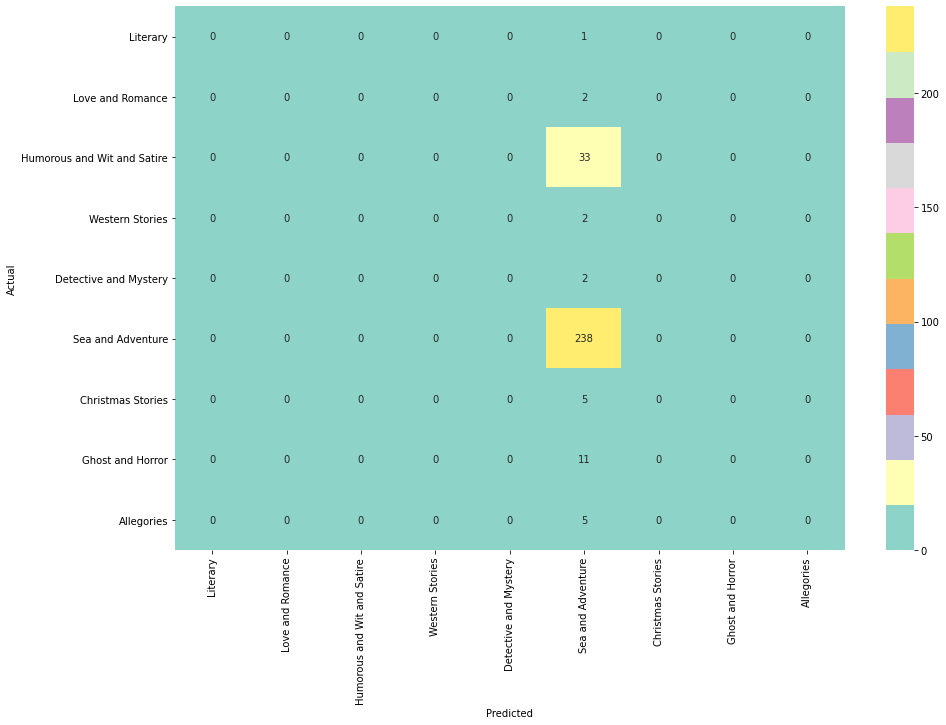

                             precision    recall  f1-score   support

                 Allegories       0.00      0.00      0.00         1
          Christmas Stories       0.00      0.00      0.00         2
      Detective and Mystery       0.00      0.00      0.00        33
           Ghost and Horror       0.00      0.00      0.00         2
Humorous and Wit and Satire       0.00      0.00      0.00         2
                   Literary       0.80      1.00      0.89       238
           Love and Romance       0.00      0.00      0.00         5
          Sea and Adventure       0.00      0.00      0.00        11
            Western Stories       0.00      0.00      0.00         5

                   accuracy                           0.80       299
                  macro avg       0.09      0.11      0.10       299
               weighted avg       0.63      0.80      0.71       299

                   NaiveBayes
Accuracy                0.796
Balanced accuracy       0.111


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [105]:
#Calling with NB
trial1 = Pipeline([ ('vectorizer', TfidfVectorizer(max_df = .10, stop_words=stopwords.words('english'))), ('classifier', MultinomialNB())])


#It shall just give me over alla ccuracy and CM for bag of words approach in imbalaned data
df_scores=eve_clf(trial1, X, y, df_scores,'NaiveBayes')
print(df_scores)

Accuracy: 0.8060200668896321, Time duration: 14.538039922714233
Changed dataset shape y_train Counter({'Literary': 556, 'Detective and Mystery': 78, 'Sea and Adventure': 25, 'Love and Romance': 13, 'Western Stories': 13, 'Ghost and Horror': 4, 'Humorous and Wit and Satire': 4, 'Christmas Stories': 3, 'Allegories': 1})
Changed dataset shape y_test Counter({'Literary': 238, 'Detective and Mystery': 33, 'Sea and Adventure': 11, 'Love and Romance': 5, 'Western Stories': 5, 'Christmas Stories': 2, 'Humorous and Wit and Satire': 2, 'Ghost and Horror': 2, 'Allegories': 1})


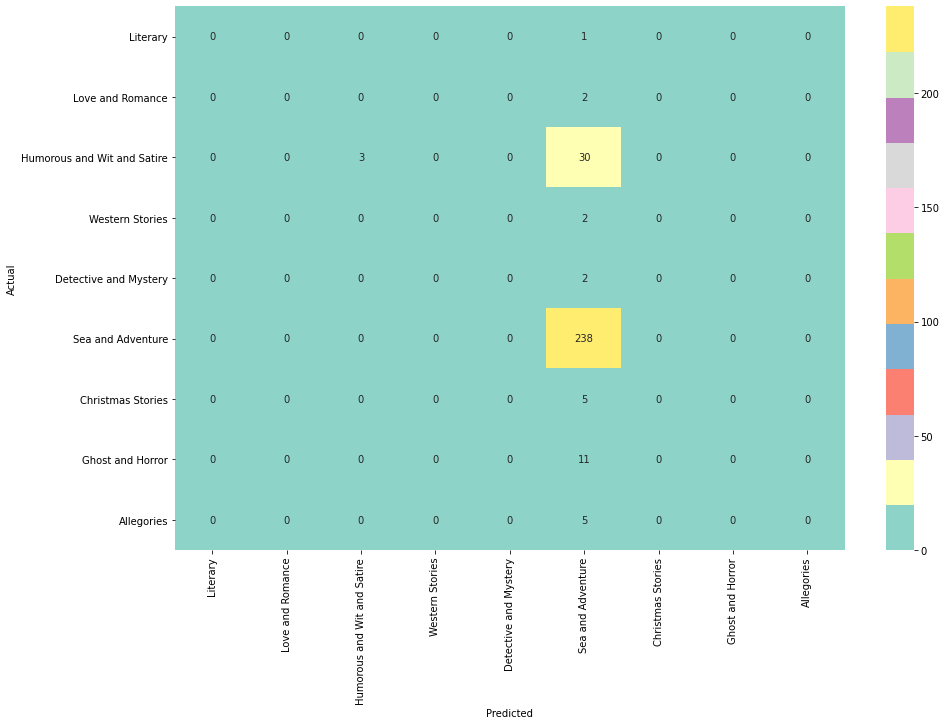

                             precision    recall  f1-score   support

                 Allegories       0.00      0.00      0.00         1
          Christmas Stories       0.00      0.00      0.00         2
      Detective and Mystery       1.00      0.09      0.17        33
           Ghost and Horror       0.00      0.00      0.00         2
Humorous and Wit and Satire       0.00      0.00      0.00         2
                   Literary       0.80      1.00      0.89       238
           Love and Romance       0.00      0.00      0.00         5
          Sea and Adventure       0.00      0.00      0.00        11
            Western Stories       0.00      0.00      0.00         5

                   accuracy                           0.81       299
                  macro avg       0.20      0.12      0.12       299
               weighted avg       0.75      0.81      0.73       299

                   NaiveBayes     LR
Accuracy                0.796  0.806
Balanced accuracy       0.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [106]:
"""Calling it with logistic regression"""

from sklearn.linear_model import LogisticRegression

trial2 = Pipeline([ ('vectorizer', TfidfVectorizer(max_df = .10,stop_words=stopwords.words('english'))), ('classifier', LogisticRegression())])

#It shall just give me over alla ccuracy and CM for bag of words approach in imbalaned data
df_scores=eve_clf(trial2, X, y, df_scores,'LR')
print(df_scores)

Accuracy: 0.822742474916388, Time duration: 14.029716968536377
Changed dataset shape y_train Counter({'Literary': 556, 'Detective and Mystery': 78, 'Sea and Adventure': 25, 'Love and Romance': 13, 'Western Stories': 13, 'Ghost and Horror': 4, 'Humorous and Wit and Satire': 4, 'Christmas Stories': 3, 'Allegories': 1})
Changed dataset shape y_test Counter({'Literary': 238, 'Detective and Mystery': 33, 'Sea and Adventure': 11, 'Love and Romance': 5, 'Western Stories': 5, 'Christmas Stories': 2, 'Humorous and Wit and Satire': 2, 'Ghost and Horror': 2, 'Allegories': 1})


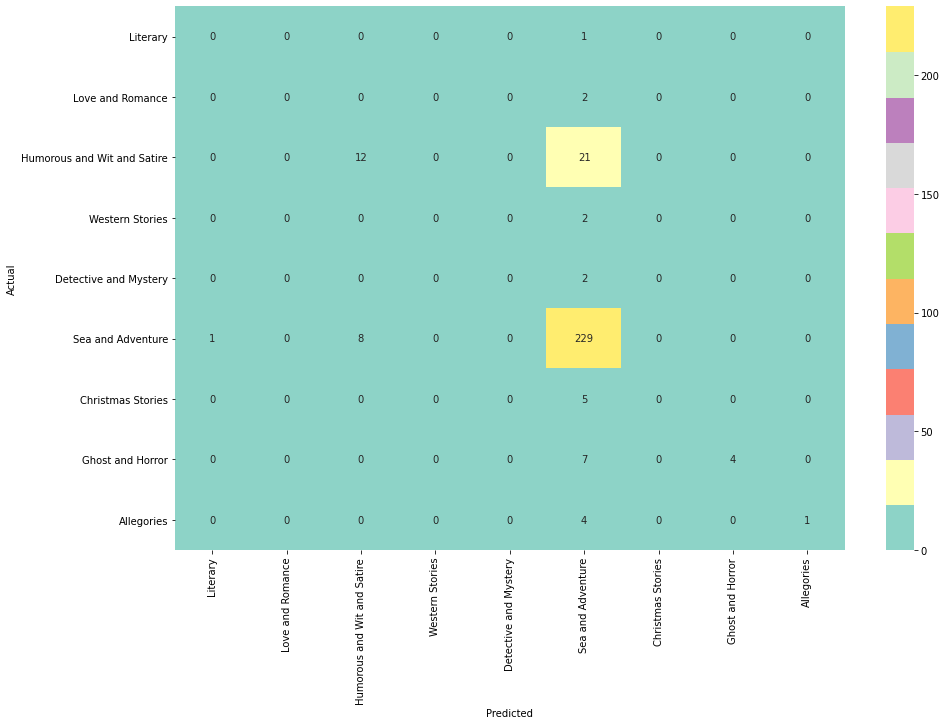

                             precision    recall  f1-score   support

                 Allegories       0.00      0.00      0.00         1
          Christmas Stories       0.00      0.00      0.00         2
      Detective and Mystery       0.60      0.36      0.45        33
           Ghost and Horror       0.00      0.00      0.00         2
Humorous and Wit and Satire       0.00      0.00      0.00         2
                   Literary       0.84      0.96      0.90       238
           Love and Romance       0.00      0.00      0.00         5
          Sea and Adventure       1.00      0.36      0.53        11
            Western Stories       1.00      0.20      0.33         5

                   accuracy                           0.82       299
                  macro avg       0.38      0.21      0.25       299
               weighted avg       0.79      0.82      0.79       299

                   NaiveBayes     LR  LR with weights
Accuracy                0.796  0.806          

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [107]:
"""Calling it with cost sensitive logistic regression"""

from sklearn.linear_model import LogisticRegression

trial2 = Pipeline([ ('vectorizer', TfidfVectorizer(max_df = .10,stop_words=stopwords.words('english'))), ('classifier', LogisticRegression(class_weight = 'balanced'))])

#It shall just give me over alla ccuracy and CM for bag of words approach in imbalaned data
df_scores=eve_clf(trial2, X, y, df_scores,'LR with weights')
print(df_scores)

Accuracy: 0.8060200668896321, Time duration: 27.787358283996582
Changed dataset shape y_train Counter({'Literary': 556, 'Detective and Mystery': 78, 'Sea and Adventure': 25, 'Love and Romance': 13, 'Western Stories': 13, 'Ghost and Horror': 4, 'Humorous and Wit and Satire': 4, 'Christmas Stories': 3, 'Allegories': 1})
Changed dataset shape y_test Counter({'Literary': 238, 'Detective and Mystery': 33, 'Sea and Adventure': 11, 'Love and Romance': 5, 'Western Stories': 5, 'Christmas Stories': 2, 'Humorous and Wit and Satire': 2, 'Ghost and Horror': 2, 'Allegories': 1})


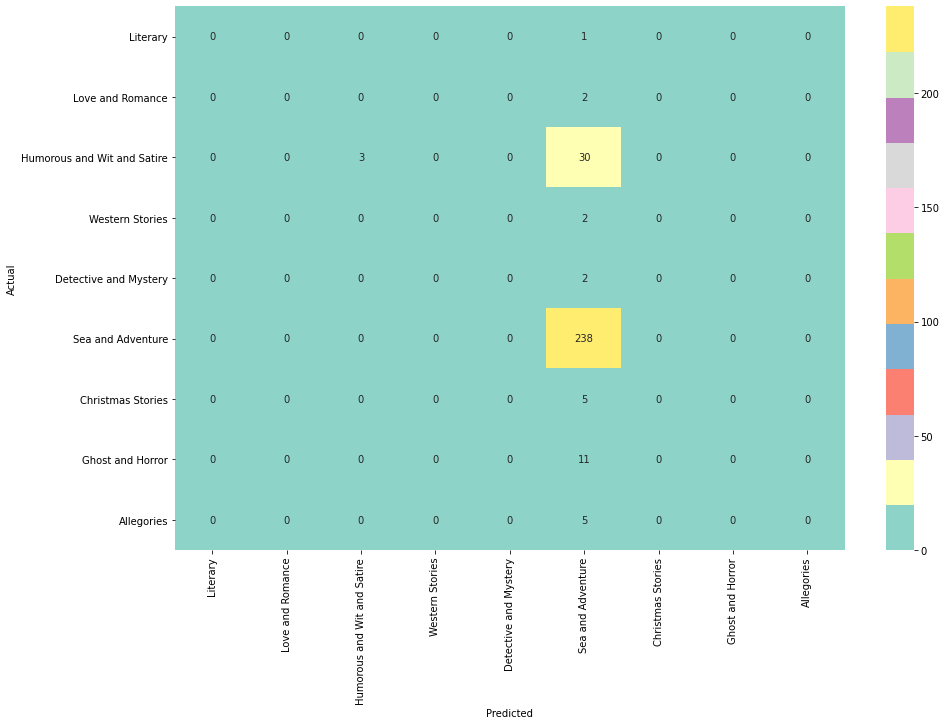

                             precision    recall  f1-score   support

                 Allegories       0.00      0.00      0.00         1
          Christmas Stories       0.00      0.00      0.00         2
      Detective and Mystery       1.00      0.09      0.17        33
           Ghost and Horror       0.00      0.00      0.00         2
Humorous and Wit and Satire       0.00      0.00      0.00         2
                   Literary       0.80      1.00      0.89       238
           Love and Romance       0.00      0.00      0.00         5
          Sea and Adventure       0.00      0.00      0.00        11
            Western Stories       0.00      0.00      0.00         5

                   accuracy                           0.81       299
                  macro avg       0.20      0.12      0.12       299
               weighted avg       0.75      0.81      0.73       299

                   NaiveBayes     LR  LR with weights    SVM
Accuracy                0.796  0.806   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [108]:
"""Calling it with SVM without class balance"""

from sklearn.svm import SVC

trial2 = Pipeline([ ('vectorizer', TfidfVectorizer(max_df = .10,stop_words=stopwords.words('english'))), ('classifier', SVC())])

#It shall just give me over alla ccuracy and CM for bag of words approach in imbalaned data
df_scores=eve_clf(trial2, X, y, df_scores,'SVM')
print(df_scores)

Accuracy: 0.8127090301003345, Time duration: 28.121787309646606
Changed dataset shape y_train Counter({'Literary': 556, 'Detective and Mystery': 78, 'Sea and Adventure': 25, 'Love and Romance': 13, 'Western Stories': 13, 'Ghost and Horror': 4, 'Humorous and Wit and Satire': 4, 'Christmas Stories': 3, 'Allegories': 1})
Changed dataset shape y_test Counter({'Literary': 238, 'Detective and Mystery': 33, 'Sea and Adventure': 11, 'Love and Romance': 5, 'Western Stories': 5, 'Christmas Stories': 2, 'Humorous and Wit and Satire': 2, 'Ghost and Horror': 2, 'Allegories': 1})


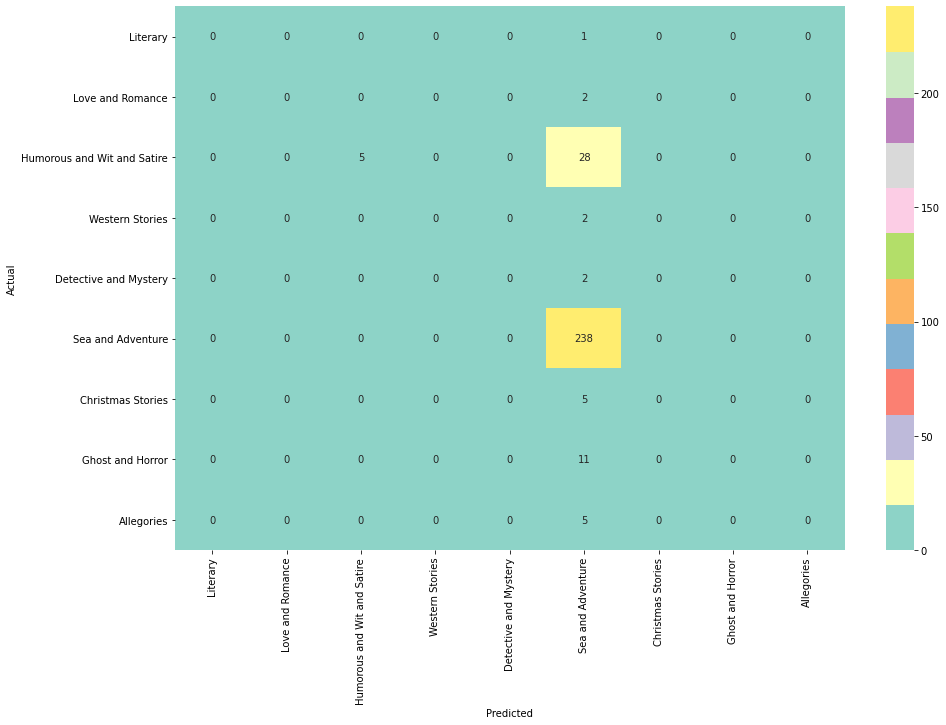

                             precision    recall  f1-score   support

                 Allegories       0.00      0.00      0.00         1
          Christmas Stories       0.00      0.00      0.00         2
      Detective and Mystery       1.00      0.15      0.26        33
           Ghost and Horror       0.00      0.00      0.00         2
Humorous and Wit and Satire       0.00      0.00      0.00         2
                   Literary       0.81      1.00      0.89       238
           Love and Romance       0.00      0.00      0.00         5
          Sea and Adventure       0.00      0.00      0.00        11
            Western Stories       0.00      0.00      0.00         5

                   accuracy                           0.81       299
                  macro avg       0.20      0.13      0.13       299
               weighted avg       0.75      0.81      0.74       299

                   NaiveBayes     LR  LR with weights    SVM  SVM with weights
Accuracy             

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [109]:
"""Calling it with SVM with class balance"""

from sklearn.svm import SVC

trial2 = Pipeline([ ('vectorizer', TfidfVectorizer(max_df = .10,stop_words=stopwords.words('english'))), ('classifier', SVC(class_weight='balanced'))])

#It shall just give me over alla ccuracy and CM for bag of words approach in imbalaned data
df_scores=eve_clf(trial2, X, y, df_scores,'SVM with weights')
print(df_scores)

Checking bias-variance trade off

In [110]:
pip install mlxtend --upgrade --no-deps

Requirement already up-to-date: mlxtend in /usr/local/lib/python3.6/dist-packages (0.17.2)


In [0]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True,
                                                    stratify=y)

#svm = SVC(random_state=123)
lr  =LogisticRegression()

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(lr, X_train, y_train, X_test, y_test, loss='0-1_loss')

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)